In [23]:
import math
import random
import pylab
outfile = "pool.txt"
fig = pylab.figure()
K = 0.1 ## Global Death rate
R_small = 4.0 ## Resources for a small group
R_large = 50.0 ## Resources for a large group
Gc = 0.01 ## Growth rate for a cooperator
Gs = 0.02 ## Growth rate for selfish
Cc = 0.2 ## Consumption rate for a cooperator
Cs = 0.2 ## Consumption rate for selfsih
N = 4000 ## Population size
N_large = 40 ## Number of individuals in a large group
N_small = 4 ## Number of individuals in a small group
T = 120 ## Number of generations
t = 4 ## Number of time steps in groups

<Figure size 432x288 with 0 Axes>

In [24]:
Comb_num = 4
COOP_SM = 0
COOP_LG = 1
SELF_SM = 2
SELF_LG = 3

In [25]:
fre_cs = list()
fre_cl = list()
fre_ss = list()
fre_sl = list()
large = list()
selfish = list()
small = list()
coop= list()

In [26]:
def Resource(group, R):
    addall = ( group[COOP_SM] * Gc * Cc ) + ( group[COOP_LG] * Gc * Cc ) + ( group[SELF_SM] * Gs * Cs ) + ( group[SELF_LG] * Gs * Cs )
    addall = R / addall  
    resources = [0] * Comb_num
    resources[COOP_SM] = addall * group[COOP_SM] * Gc * Cc 
    resources[COOP_LG] = addall * group[COOP_LG] * Gc * Cc 
    resources[SELF_SM] = addall * group[SELF_SM] * Gs * Cs 
    resources[SELF_LG] = addall * group[SELF_LG] * Gs * Cs 
    return resources

In [27]:
def Population(group, resource):
    group[COOP_SM] = (group[COOP_SM] + ( resource[COOP_SM] / Cc ) - K * group[COOP_SM])
    group[COOP_LG] = (group[COOP_LG] + ( resource[COOP_LG] / Cc ) - K * group[COOP_LG])
    group[SELF_SM] = (group[SELF_SM] + ( resource[SELF_SM] / Cs ) - K * group[SELF_SM])
    group[SELF_LG] = (group[SELF_LG] + ( resource[SELF_LG] / Cs ) - K * group[SELF_LG])
    return group

In [28]:
def InitWrite():
    f = open(outfile, 'w')
    f.write("COOP_SM,COOP_LG,SELF_SM,SELF_LG\n")
    f.close()
    fre_cs = list()
    fre_cl = list()
    fre_ss = list()
    fre_sl = list()
    large = list()
    selfish = list()
    small = list()
    coop = list()

In [29]:
def WriteData(pool):
    f = open(outfile, 'a')
    f.write("%d,%d,%d,%d\n" % (pool[COOP_SM], pool[COOP_LG], pool[SELF_SM], pool[SELF_LG]))
    f.close()
    fre_cs.append(pool[COOP_SM] / float(N))
    fre_cl.append(pool[COOP_LG] / float(N))
    fre_ss.append(pool[SELF_SM] / float(N))
    fre_sl.append(pool[SELF_LG] / float(N))
    large.append((pool[SELF_LG] + pool[COOP_LG] )/ float(N))
    selfish.append((pool[SELF_LG] + pool[SELF_SM] )/ float(N))
    small.append((pool[SELF_SM] + pool[COOP_SM] )/ float(N))
    coop.append((pool[COOP_LG] + pool[COOP_SM] )/ float(N))
    pass


In [30]:
def PlotAll():
    pylab.figure(fig.number)
    pylab.xlabel("Generation")
    pylab.ylabel("Global frequency")
    x=range(T)
    pylab.plot(x, large, 'k:', label="Large Group Size")
    pylab.plot(x, selfish, 'k-', label="Selfish resource usage")
    pylab.plot(x, small, 'r:', label="Small Group Size")
    pylab.plot(x, coop, 'r-', label="Cooperative resource usage")
    pylab.legend(loc='upper right')
    pylab.show()
    pylab.draw()
    pylab.xlabel("Generation")
    pylab.ylabel("Global genotype frequency")
    pylab.plot(x, fre_cs, 'g-', label="Cooperative+Small") 
    pylab.plot(x, fre_cl, 'g:', label="Cooperative+Large") 
    pylab.plot(x, fre_ss, 'r-', label="Selfish+Small")
    pylab.plot(x, fre_sl, 'r:', label="Selfish+Large") 
    pylab.legend(loc='lower right')
    pylab.show()
    pylab.draw()
    pass

In [31]:
def Test():
    test = [6.0,8.0,12.0,14.0]
    r = Resource(test, R_large)
    print ("Group :")
    print (test)
    print("Resources: ")
    print (r)
    Population(test, r)
    print ("Group :")
    print (test)
    input()
    pass

In [32]:
Test()

Group :
[6.0, 8.0, 12.0, 14.0]
Resources: 
[2.542372881355932, 3.3898305084745766, 20.338983050847457, 23.728813559322035]
Group :
[30.823728813559317, 41.09830508474577, 112.49491525423727, 131.24406779661015]



[1000.0, 1000.0, 1000.0, 1000.0]
GENERATION 0
Pool Size = 91258
Scale = 0.043831
Pool Size after scale = 4000
GENERATION 1
Pool Size = 84682
Scale = 0.047235
Pool Size after scale = 3999
GENERATION 2
Pool Size = 82298
Scale = 0.048604
Pool Size after scale = 4000
GENERATION 3
Pool Size = 82555
Scale = 0.048452
Pool Size after scale = 4000
GENERATION 4
Pool Size = 82448
Scale = 0.048515
Pool Size after scale = 4000
GENERATION 5
Pool Size = 83752
Scale = 0.047760
Pool Size after scale = 4000
GENERATION 6
Pool Size = 84344
Scale = 0.047424
Pool Size after scale = 4000
GENERATION 7
Pool Size = 84345
Scale = 0.047424
Pool Size after scale = 4000
GENERATION 8
Pool Size = 84790
Scale = 0.047175
Pool Size after scale = 4000
GENERATION 9
Pool Size = 85520
Scale = 0.046773
Pool Size after scale = 4000
GENERATION 10
Pool Size = 86464
Scale = 0.046262
Pool Size after scale = 4000
GENERATION 11
Pool Size = 86737
Scale = 0.046116
Pool Size after scale = 4000
GENERATION 12
Pool Size = 86337
Scale = 0

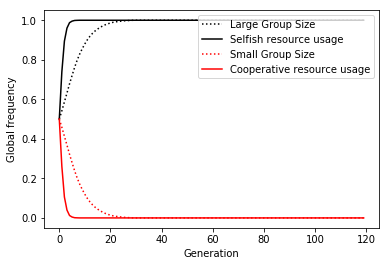

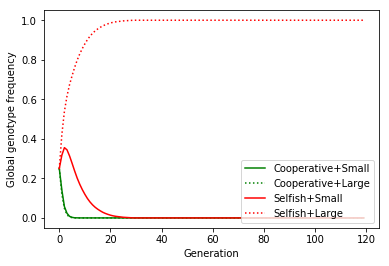

OVER!


In [ ]:
if "__main__" == __name__:
    InitWrite()
    pool = list()
    for i in range(Comb_num):
        pool.append( float(N / Comb_num ) )
    print (pool)
    for g in range(T):
        print("GENERATION %d" % g)
        WriteData(pool)
        smallgroups = list()
        largegroups = list()
        sm = int((pool[COOP_SM] + pool[SELF_SM]) / N_small)
        md = int((pool[COOP_SM] + pool[SELF_SM]) / N_small)
        lg = int((pool[COOP_LG] + pool[SELF_LG]) / N_large)
        if sm:
            p_sm_coop = pool[COOP_SM] / ( pool[COOP_SM] + pool[SELF_SM])
            for i in range(sm):
                group = [0.0] * Comb_num
                for i in range(N_small): 
                    if (random.random() < p_sm_coop):
                        group[COOP_SM] += 1
                    else:
                        group[SELF_SM] += 1
                smallgroups.append(group)
        if lg:
            p_lg_coop = pool[COOP_LG] / ( pool[COOP_LG] + pool[SELF_LG])
            for i in range(lg):
                group = [0.0] * Comb_num
                for i in range(N_large): 
                    if (random.random() < p_lg_coop):
                        group[COOP_LG] += 1
                    else:
                        group[SELF_LG] += 1
                largegroups.append(group)

        for group in largegroups:
            for _t in range(t):
                rl = Resource(group, R_large)
                Population(group, rl)
        for group in smallgroups:
            for _t in range(t):
                rs = Resource(group, R_small)
                Population(group, rs)
        pool = [0.0]*Comb_num
        for group in (largegroups + smallgroups):
            for i in range(Comb_num):
                pool[i] += group[i]
        print("Pool Size = %d" % sum(pool))
        scale = float(N) / float(sum(pool)) 
        print("Scale = %f" % scale)
        for i in range(Comb_num):
            pool[i] = ((pool[i] * scale))
        print("Pool Size after scale = %d" % sum(pool))
    PlotAll()
    print("OVER!")
    input()
    pass



